#  Objective 
### Tweet Data Analysis on Twitter Dataset

     Topic Modeling on Twitter Dataset






### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   Our task here is to discover abstract topics from tweets.

## Data Understanding
### Loading necessary packages

In [1]:
!pip install wordcloud
!pip install gensim
!pip install wordcloud
#!pip install --upgrade gensim

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
#from wordcloud import corpora
import pandas as pd
import statistics
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [3]:
#To read csv file and create dataframe
tweets = pd.read_csv('../data/clean_processed_tweet.csv')
tweets.head()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image lets focus specifi...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


# Explore Dataset

In [4]:
#To get information abou the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          999 non-null    int64  
 1   created_at          999 non-null    object 
 2   source              999 non-null    object 
 3   Original_Text       999 non-null    object 
 4   full_text           999 non-null    object 
 5   sentiment           999 non-null    int64  
 6   polarity            999 non-null    float64
 7   subjectivity        999 non-null    float64
 8   lang                999 non-null    object 
 9   favorite_count      999 non-null    int64  
 10  retweet_count       999 non-null    int64  
 11  possibly_sensitive  246 non-null    object 
 12  hashtags            877 non-null    object 
 13  user_mentions       875 non-null    object 
 14  place               568 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.2+ K

#### Number of missing value in the data

In [5]:
print("The number of missing value(s) based on columns:\n{}".format(tweets.isnull().sum()))
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s) based on columns:
Unnamed: 0              0
created_at              0
source                  0
Original_Text           0
full_text               0
sentiment               0
polarity                0
subjectivity            0
lang                    0
favorite_count          0
retweet_count           0
possibly_sensitive    753
hashtags              122
user_mentions         124
place                 431
dtype: int64
The number of missing value(s): 1430
Columons having columns value:Index(['possibly_sensitive', 'hashtags', 'user_mentions', 'place'], dtype='object')


### Data Preparation 

In [6]:
#full twitter data text
tweets_df = pd.DataFrame(columns=['full_text'])
tweets_df['full_text'] =  tweets['full_text'].to_list()

In [7]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,full_text
0,iameztoy extra random image lets focus specifi...
1,indopacinfo chinas media explains military rea...
2,china even cut communication dont anwer phonec...
3,putin xijinping told friend taiwan vassal stat...
4,chinauncensored im sorry thought taiwan indepe...
...,...
994,robertq polymatech invests us billion semicond...
995,spokespersonchn taiwan part china thats absolu...
996,indopacinfo chinese media pla eastern theater ...
997,indopacinfo lithuanian delegation headed minis...


Prepare full text



In [8]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../')))

In [16]:
from clean_tweets_dataframe import Clean_Tweets

In [17]:
tweets_df = pd.DataFrame(columns=['Original_Text','full_text','retweet_count', 'sentiment', 'hashtags', 'lang'])
tweets_df['Original_Text'] = tweets['Original_Text'].to_list()
tweets_df['full_text'] =  tweets['full_text'].to_list()
tweets_df['sentiment'] =  tweets['sentiment'].to_list()
tweets_df['lang'] = tweets['lang'].to_list()
tweets_df['hashtags'] = tweets['hashtags'].to_list()
tweets_df['retweet_count'] = tweets['retweet_count'].to_list()
tweets_df.head()

,Original_Text,full_text,retweet_count,sentiment,hashtags,lang
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image lets focus specifi...,2,0,City,en
1,RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,201,0,"China, Taiwan",en
2,"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,0,-1,XiJinping,en
3,"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,0,1,XiJinping,en
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,381,0,NaN,en


In [46]:
tweets_df = tweets_df.fillna("")
tweets_df

,Original_Text,full_text,retweet_count,sentiment,hashtags,lang,flattened_hashtags_df
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image lets focus specifi...,2,0,"[#City, #Ta]",en,#City
1,RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,201,0,"[#China, #Taiwan]",en,#Ta
2,"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,0,-1,[#XiJinping],en,#China
3,"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,0,1,[#XiJinping],en,#Taiwan
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,381,0,[],en,#XiJinping
...,...,...,...,...,...,...,...
994,RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,robertq polymatech invests us billion semicond...,2,-1,[#semiconductor],en,#Taiwan
995,"RT @SpokespersonCHN: ""#Taiwan is part of China...",spokespersonchn taiwan part china thats absolu...,669,1,[#Taiwan],en,#ChinaTaiwanCrisis
996,"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",indopacinfo chinese media pla eastern theater ...,60,0,"[#PLA, #Taiwan]",en,#Pelosi
997,RT @IndoPac_Info: 1) A Lithuanian delegation h...,indopacinfo lithuanian delegation headed minis...,66,-1,[#Taiwan],en,#Taiwan


### Analysis on Hashtags

In [19]:
re.findall?

In [20]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [21]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.Original_Text.apply(find_hashtags)
print(tweets_df['hashtags'])

0           [#City, #Ta]
1      [#China, #Taiwan]
2           [#XiJinping]
3           [#XiJinping]
4                     []
             ...        
994     [#semiconductor]
995            [#Taiwan]
996      [#PLA, #Taiwan]
997            [#Taiwan]
998               [#CCP]
Name: hashtags, Length: 999, dtype: object


In [26]:
#create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in tweets_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [27]:
flattened_hashtags_df

,hashtag
0,#City
1,#Ta
2,#China
3,#Taiwan
4,#XiJinping
...,...
2289,#Taiwan
2290,#PLA
2291,#Taiwan
2292,#Taiwan


In [29]:
#add hashtags to tweet_df
tweets_df["flattened_hashtags_df"]= flattened_hashtags_df

In [45]:
tweets_df.iloc[:10]

,Original_Text,full_text,retweet_count,sentiment,hashtags,lang,flattened_hashtags_df
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image lets focus specifi...,2,0,"[#City, #Ta]",en,#City
1,RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,201,0,"[#China, #Taiwan]",en,#Ta
2,"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,0,-1,[#XiJinping],en,#China
3,"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,0,1,[#XiJinping],en,#Taiwan
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,381,0,[],en,#XiJinping
5,RT @benedictrogers: We must not let this happe...,benedictrogers must let happen must ready must...,36,1,[#Taiwan],en,#XiJinping
6,RT @TGTM_Official: What kind of country can co...,tgtmofficial kind country connive extremely of...,411,1,"[#Taiwan, #TsaiIngwen, #TheGreatTranslati]",en,#Taiwan
7,RT @ChinaInfo777: #PinkFloyd singer Roger Wate...,chinainfo pinkfloyd singer roger waters rebuke...,5,-1,"[#PinkFloyd, #Taiwan, #China]",en,#Taiwan
8,RT @AmbQinGang: China's SC&amp;FM Wang Yi elab...,ambqingang chinas scampfm wang yi elaborates c...,239,-1,[#Taiwan],en,#TsaiIngwen
9,RT @CGMeifangZhang: Chinese ambassador to the ...,cgmeifangzhang chinese ambassador us detailed ...,25,1,"[#USA, #Pelosi, #Taiwan, #China]",en,#TheGreatTranslati


<AxesSubplot:>

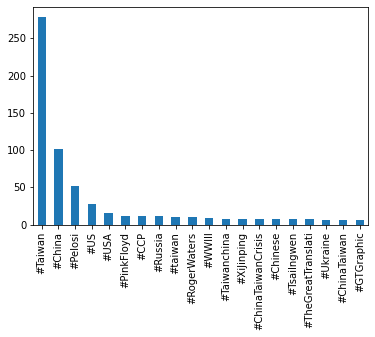

In [31]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags_df'].value_counts()[:20].plot(kind='bar')

### Analyzing data using language attribute

In [32]:
#ploting Tweets by language 
tweets = pd.DataFrame(columns=['Original_Text','lang'])

tweets['Original_Text'] =  tweets_df['Original_Text'].to_list()
tweets['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

<AxesSubplot:title={'center':'Top languages'}, xlabel='Languages', ylabel='Number of tweets'>

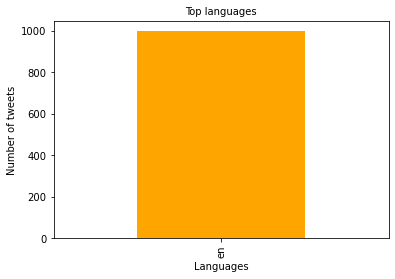

In [33]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [34]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [35]:
English_tweets

,Original_Text,full_text,retweet_count,sentiment,hashtags,lang,flattened_hashtags_df
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,iameztoy extra random image lets focus specifi...,2,0,"[#City, #Ta]",en,#City
1,RT @IndoPac_Info: #China's media explains the ...,indopacinfo chinas media explains military rea...,201,0,"[#China, #Taiwan]",en,#Ta
2,"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,0,-1,[#XiJinping],en,#China
3,"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,0,1,[#XiJinping],en,#Taiwan
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",chinauncensored im sorry thought taiwan indepe...,381,0,[],en,#XiJinping
...,...,...,...,...,...,...,...
994,RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,robertq polymatech invests us billion semicond...,2,-1,[#semiconductor],en,#Taiwan
995,"RT @SpokespersonCHN: ""#Taiwan is part of China...",spokespersonchn taiwan part china thats absolu...,669,1,[#Taiwan],en,#ChinaTaiwanCrisis
996,"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",indopacinfo chinese media pla eastern theater ...,60,0,"[#PLA, #Taiwan]",en,#Pelosi
997,RT @IndoPac_Info: 1) A Lithuanian delegation h...,indopacinfo lithuanian delegation headed minis...,66,-1,[#Taiwan],en,#Taiwan


###Text Preprocessing

In [36]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['Original_Text'].astype(str)
English_tweets['clean_text'] = English_tweets['Original_Text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['Original_Text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

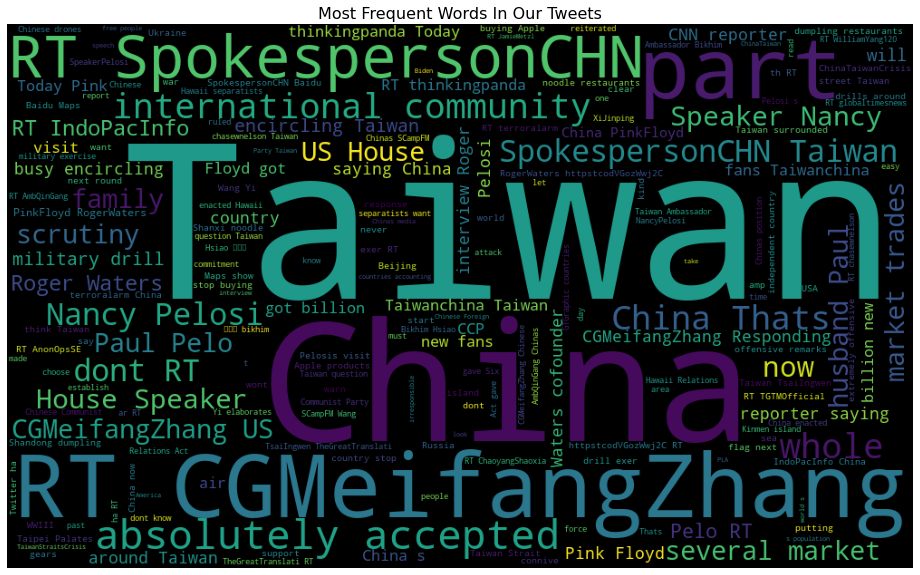

In [37]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [38]:
tweets_df.to_csv('../data/model_data.csv', index=False)

In [ ]:
##Twitter Data Analysis